PROYECTO 9

#Librerias

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno 
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_regression, make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.datasets import load_iris

!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Base de datos

In [ ]:
df = pd.read_csv('/economicasbase.csv')

In [ ]:
df

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,S,CC,COLOMBIA,M,02/10/1991,...,NaN,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,S,CC,COLOMBIA,F,23/07/1998,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,S,CC,COLOMBIA,M,23/09/1997,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,EK202120232172,2001,ANÁLISIS ECONÓMICO,151,2,S,CC,COLOMBIA,M,18/03/1996,...,3.0,93,87,196,93,98,75.589753,4.0,4,PUBLICAR
3851,EK202120320571,2001,ANÁLISIS ECONÓMICO,162,3,S,CC,COLOMBIA,F,26/07/2000,...,3.0,80,69,192,90,97,75.346915,4.0,4,PUBLICAR
3852,EK202120313923,2001,ANÁLISIS ECONÓMICO,0,1,S,CC,COLOMBIA,F,30/01/1989,...,3.0,71,57,158,47,70,48.890151,2.0,2,PUBLICAR
3853,EK202120281981,2001,ANÁLISIS ECONÓMICO,110,1,S,CC,COLOMBIA,F,23/04/1998,...,1.0,14,9,117,6,15,43.091355,1.0,2,PUBLICAR


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTU_CONSECUTIVO                3855 non-null   object 
 1   RESULT_CODIGOPRUEBA             3855 non-null   int64  
 2   RESULT_NOMBREPRUEBA             3855 non-null   object 
 3   RESULT_PUNTAJE                  3855 non-null   int64  
 4   RESULT_DESEMPENO                3855 non-null   int64  
 5   ESTU_AGREGADO                   3855 non-null   object 
 6   ESTU_TIPODOCUMENTO              3855 non-null   object 
 7   ESTU_NACIONALIDAD               3855 non-null   object 
 8   ESTU_GENERO                     3855 non-null   object 
 9   ESTU_FECHANACIMIENTO            3855 non-null   object 
 10  ESTU_EXTERIOR                   3855 non-null   object 
 11  PERIODO                         3855 non-null   int64  
 12  ESTU_ESTUDIANTE                 38

# limpieza de datos 

In [ ]:
##MISSING VALUES

In [ ]:
df.isna().sum() 

ESTU_CONSECUTIVO              0
RESULT_CODIGOPRUEBA           0
RESULT_NOMBREPRUEBA           0
RESULT_PUNTAJE                0
RESULT_DESEMPENO              0
                           ... 
PERCENTIL_GLOBAL              0
ESTU_INSE_INDIVIDUAL        131
ESTU_NSE_INDIVIDUAL         131
ESTU_NSE_IES                  0
ESTU_ESTADOINVESTIGACION      0
Length: 97, dtype: int64

In [ ]:
# Hay 131 valores perdidos para las columnas ESTU_INSE_INDIVIDUAL, ESTU_NSE_INDIVIDUAL

In [ ]:
df[['ESTU_INSE_INDIVIDUAL','ESTU_NSE_INDIVIDUAL']].tail(10) # Creamos un DataFrame que nos permita revisar estas dos columnas y el registro de sus ultimos 10 datos. 

,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL
3845,47.715487,2.0
3846,47.771456,2.0
3847,55.112615,2.0
3848,47.231209,2.0
3849,50.444779,2.0
3850,75.589753,4.0
3851,75.346915,4.0
3852,48.890151,2.0
3853,43.091355,1.0
3854,NaN,NaN


In [ ]:
df['ESTU_INSE_INDIVIDUAL']=df['ESTU_NSE_INDIVIDUAL'].fillna(0)

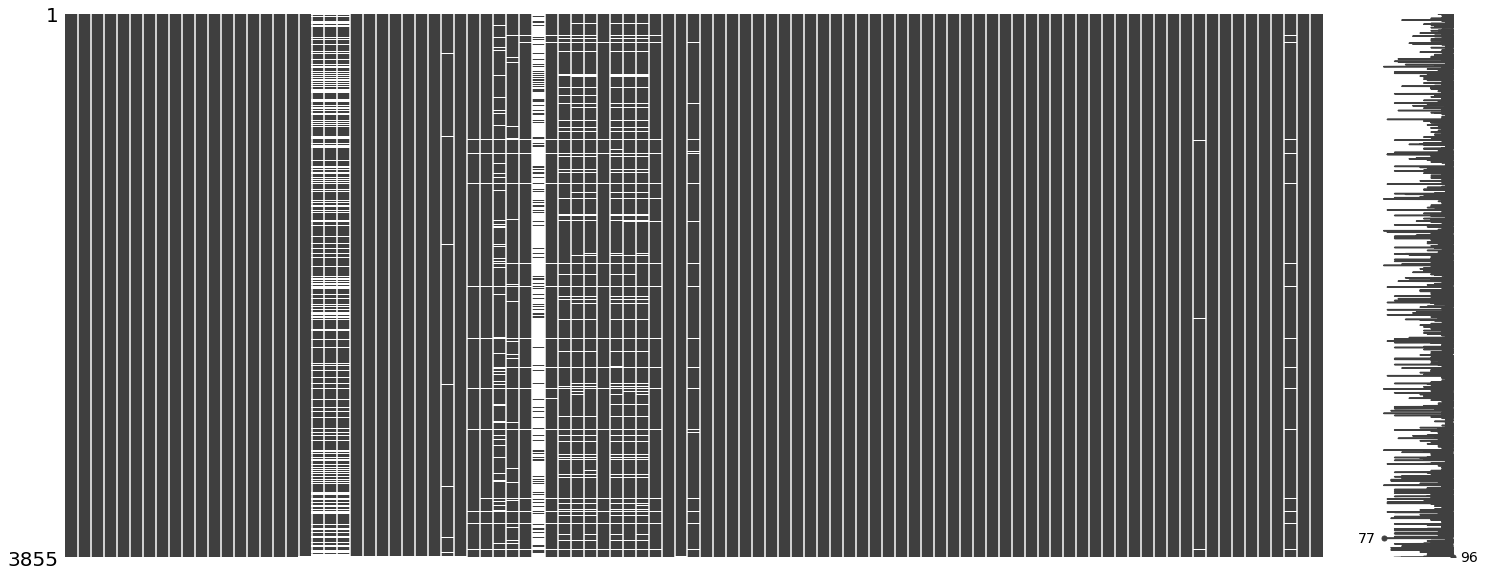

In [ ]:
msno.matrix(df)

In [ ]:
#OUTLIERS

In [ ]:
df2=df[['RESULT_PUNTAJE',	'RESULT_DESEMPENO', 'MOD_COMUNI_ESCRITA_DESEM',	'MOD_COMUNI_ESCRITA_PNAL',	'MOD_COMUNI_ESCRITA_PNBC',	'PUNT_GLOBAL',	'PERCENTIL_NBC',	'PERCENTIL_GLOBAL',	'ESTU_INSE_INDIVIDUAL',	'ESTU_NSE_INDIVIDUAL',	'ESTU_NSE_IES']]

In [ ]:
mahal_distances = []

for row in df2.to_numpy():
  mahal_distances.append(mahalanobis(row, df2.mean(), np.linalg.inv(np.cov(df2.values.T))))

In [ ]:
df['mahal_distances'] = mahal_distances

In [ ]:
df['p_value'] = 1 - st.chi2.cdf(df['mahal_distances'], 3855-1)

In [ ]:
df #Nuevo df con mahal_distances y p_value columns

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION,mahal_distances,p_value
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,57,201,95,99,2.0,2.0,3,PUBLICAR,NaN,NaN
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,100,222,99,100,4.0,4.0,4,PUBLICAR,NaN,NaN
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,S,CC,COLOMBIA,M,02/10/1991,...,1,88,1,2,1.0,1.0,2,PUBLICAR,NaN,NaN
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,S,CC,COLOMBIA,F,23/07/1998,...,7,159,49,71,4.0,4.0,2,PUBLICAR,NaN,NaN
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,S,CC,COLOMBIA,M,23/09/1997,...,13,156,44,67,2.0,2.0,2,PUBLICAR,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,EK202120232172,2001,ANÁLISIS ECONÓMICO,151,2,S,CC,COLOMBIA,M,18/03/1996,...,87,196,93,98,4.0,4.0,4,PUBLICAR,NaN,NaN
3851,EK202120320571,2001,ANÁLISIS ECONÓMICO,162,3,S,CC,COLOMBIA,F,26/07/2000,...,69,192,90,97,4.0,4.0,4,PUBLICAR,NaN,NaN
3852,EK202120313923,2001,ANÁLISIS ECONÓMICO,0,1,S,CC,COLOMBIA,F,30/01/1989,...,57,158,47,70,2.0,2.0,2,PUBLICAR,NaN,NaN
3853,EK202120281981,2001,ANÁLISIS ECONÓMICO,110,1,S,CC,COLOMBIA,F,23/04/1998,...,9,117,6,15,1.0,1.0,2,PUBLICAR,NaN,NaN


In [ ]:
#INCONSISTENT DATA

In [ ]:
df.drop(columns=['mahal_distances','p_value'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTU_CONSECUTIVO                3855 non-null   object 
 1   RESULT_CODIGOPRUEBA             3855 non-null   int64  
 2   RESULT_NOMBREPRUEBA             3855 non-null   object 
 3   RESULT_PUNTAJE                  3855 non-null   int64  
 4   RESULT_DESEMPENO                3855 non-null   int64  
 5   ESTU_AGREGADO                   3855 non-null   object 
 6   ESTU_TIPODOCUMENTO              3855 non-null   object 
 7   ESTU_NACIONALIDAD               3855 non-null   object 
 8   ESTU_GENERO                     3855 non-null   object 
 9   ESTU_FECHANACIMIENTO            3855 non-null   object 
 10  ESTU_EXTERIOR                   3855 non-null   object 
 11  PERIODO                         3855 non-null   int64  
 12  ESTU_ESTUDIANTE                 38

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print('---'*10)

ESTU_CONSECUTIVO
['EK202120243329' 'EK202120227314' 'EK202120088295' ... 'EK202120313923'
 'EK202120281981' 'EK202120224998']
------------------------------
RESULT_CODIGOPRUEBA
[2001]
------------------------------
RESULT_NOMBREPRUEBA
['ANÁLISIS ECONÓMICO']
------------------------------
RESULT_PUNTAJE
[128 209 106  89 122  96 116 215 125 131 112 115 133 129 164 109 154  87
  84 105 162 114 111 199 203 188 142 107  98 126 123 137  72 118 168 184
 117  92 186  95  70  82 148 189 173 178 156 182  83  93 165 150 140 152
 136 127 100 146 108 166 120  90 102 124 160 139 155 187 157 169 119 170
 103 138 228 130 104 144 226  86  85 113 218 185 134 221 179 132 151 158
 200  94 194  60 149 141 210  99  91 190 174 175 145 216 172 163 193  77
 147 143 181 201  97 135 121 220  88 153   0 171  73 101  81  80  74  54
 159 202  79 243 205  64 177 222 183  75  76 167 191 110 196  68  61 208
 161 207 234 195 197 180 211 231  63 232  78  71  65 192 198 213 176 204
  69 246 206 224  49 225  67 245 219  4

In [ ]:
df[['RESULT_PUNTAJE',	'RESULT_DESEMPENO', 'MOD_COMUNI_ESCRITA_DESEM',	'MOD_COMUNI_ESCRITA_PNAL',	'MOD_COMUNI_ESCRITA_PNBC',	'PUNT_GLOBAL',	'PERCENTIL_NBC',	'PERCENTIL_GLOBAL',	'ESTU_INSE_INDIVIDUAL',	'ESTU_NSE_INDIVIDUAL',	'ESTU_NSE_IES']].describe()

,RESULT_PUNTAJE,RESULT_DESEMPENO,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES
count,3855.000000,3855.000000,3801.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3724.000000,3855.000000
mean,123.739818,1.622049,2.552749,59.087938,49.790921,159.772763,50.912581,66.143191,2.260182,2.339689,2.204929
std,36.175271,0.823615,0.835979,29.619982,29.587852,27.648861,29.371215,27.476116,1.218270,1.162039,0.945877
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,102.000000,1.000000,2.000000,34.000000,24.000000,142.000000,25.000000,46.000000,1.000000,1.000000,2.000000
50%,119.000000,1.000000,3.000000,65.000000,50.000000,160.000000,51.000000,73.000000,2.000000,2.000000,2.000000
75%,144.000000,2.000000,3.000000,85.000000,75.000000,178.000000,77.000000,90.000000,4.000000,4.000000,3.000000
max,300.000000,4.000000,4.000000,100.000000,100.000000,263.000000,100.000000,100.000000,4.000000,4.000000,4.000000


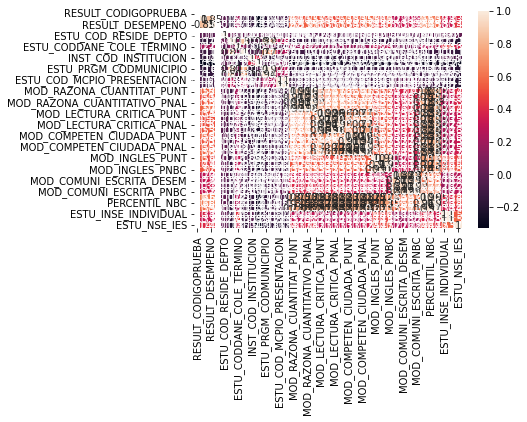

In [ ]:
sns.heatmap(df.corr(), annot=True)

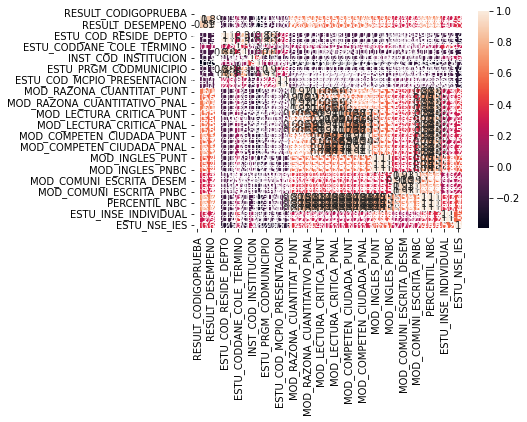

In [ ]:
sns.heatmap(df.corr(method='spearman'), annot=True)

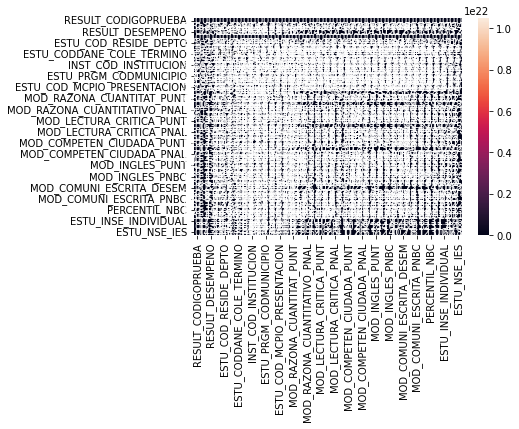

In [ ]:
sns.heatmap(df.cov(), annot=True)

In [ ]:
for col in df.select_dtypes('category').columns:
  df[col].value_counts().plot(kind='bar')
  if col == 'PERCENTIL_GLOBAL':
    df[col].value_counts()[:15].plot(kind='bar')
  plt.show()

In [ ]:
df.describe()

,RESULT_CODIGOPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,PERIODO,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,INST_COD_INSTITUCION,ESTU_SNIES_PRGMACADEMICO,...,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES
count,3855.0,3855.000000,3855.000000,3855.0,3855.000000,3855.000000,2.768000e+03,2768.000000,3855.000000,3855.000000,...,3855.000000,3801.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3724.000000,3855.000000
mean,2001.0,123.739818,1.622049,20212.0,55.073152,29283.845396,2.364019e+11,32569.526012,1893.681453,29043.246174,...,149.962387,2.552749,59.087938,49.790921,159.772763,50.912581,66.143191,2.260182,2.339689,2.204929
std,0.0,36.175271,0.823615,0.0,1610.310349,25136.372255,1.025651e+11,25939.905800,1311.513573,35056.757368,...,41.331389,0.835979,29.619982,29.587852,27.648861,29.371215,27.476116,1.218270,1.162039,0.945877
min,2001.0,0.000000,1.000000,20212.0,5.000000,5001.000000,1.500010e+10,5001.000000,1101.000000,18.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2001.0,102.000000,1.000000,20212.0,11.000000,11001.000000,1.255130e+11,11001.000000,1205.000000,1442.000000,...,126.000000,2.000000,34.000000,24.000000,142.000000,25.000000,46.000000,1.000000,1.000000,2.000000
50%,2001.0,119.000000,1.000000,20212.0,13.000000,13001.000000,2.520010e+11,19055.500000,1714.000000,9980.000000,...,154.000000,3.000000,65.000000,50.000000,160.000000,51.000000,73.000000,2.000000,2.000000,2.000000
75%,2001.0,144.000000,2.000000,20212.0,50.000000,50006.000000,3.130010e+11,54001.000000,1826.000000,53470.000000,...,171.000000,3.000000,85.000000,75.000000,178.000000,77.000000,90.000000,4.000000,4.000000,3.000000
max,2001.0,300.000000,4.000000,20212.0,99999.000000,99999.000000,5.540013e+11,99524.000000,9913.000000,105814.000000,...,300.000000,4.000000,100.000000,100.000000,263.000000,100.000000,100.000000,4.000000,4.000000,4.000000


In [ ]:
#DUPLICATED DATA

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3850    False
3851    False
3852    False
3853    False
3854    False
Length: 3855, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 3854
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTU_CONSECUTIVO                3855 non-null   object 
 1   RESULT_CODIGOPRUEBA             3855 non-null   int64  
 2   RESULT_NOMBREPRUEBA             3855 non-null   object 
 3   RESULT_PUNTAJE                  3855 non-null   int64  
 4   RESULT_DESEMPENO                3855 non-null   int64  
 5   ESTU_AGREGADO                   3855 non-null   object 
 6   ESTU_TIPODOCUMENTO              3855 non-null   object 
 7   ESTU_NACIONALIDAD               3855 non-null   object 
 8   ESTU_GENERO                     3855 non-null   object 
 9   ESTU_FECHANACIMIENTO            3855 non-null   object 
 10  ESTU_EXTERIOR                   3855 non-null   object 
 11  PERIODO                         3855 non-null   int64  
 12  ESTU_ESTUDIANTE                 38

In [ ]:
float_cols = df.select_dtypes('float64').columns

In [ ]:
for col in float_cols:
  df[col] = df[col].astype('float16')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 3854
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTU_CONSECUTIVO                3855 non-null   object 
 1   RESULT_CODIGOPRUEBA             3855 non-null   int64  
 2   RESULT_NOMBREPRUEBA             3855 non-null   object 
 3   RESULT_PUNTAJE                  3855 non-null   int64  
 4   RESULT_DESEMPENO                3855 non-null   int64  
 5   ESTU_AGREGADO                   3855 non-null   object 
 6   ESTU_TIPODOCUMENTO              3855 non-null   object 
 7   ESTU_NACIONALIDAD               3855 non-null   object 
 8   ESTU_GENERO                     3855 non-null   object 
 9   ESTU_FECHANACIMIENTO            3855 non-null   object 
 10  ESTU_EXTERIOR                   3855 non-null   object 
 11  PERIODO                         3855 non-null   int64  
 12  ESTU_ESTUDIANTE                 38

In [ ]:

#DATA VISUALIZATION

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


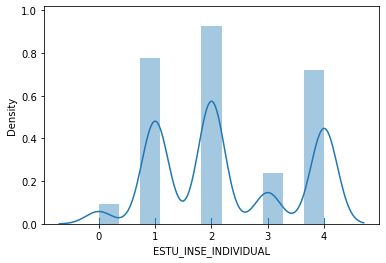

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


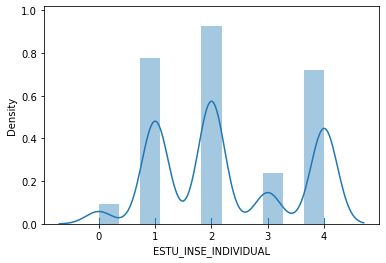

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


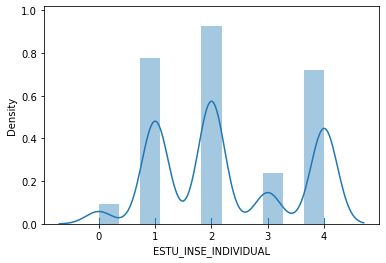

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


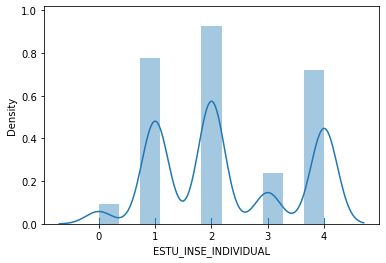

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


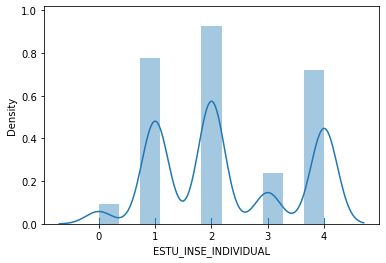

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


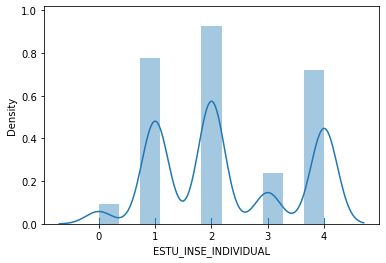

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


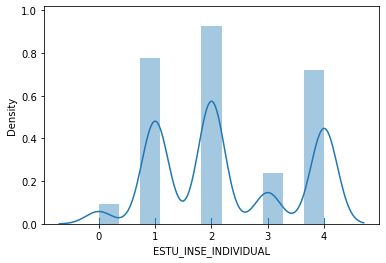

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


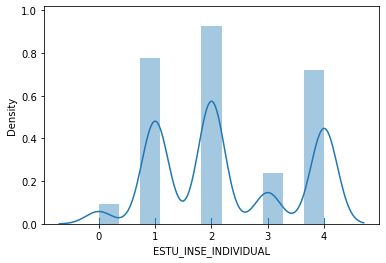

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


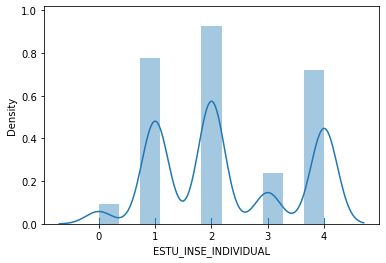

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


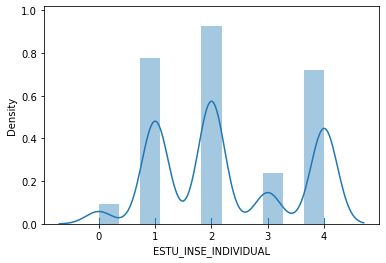

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


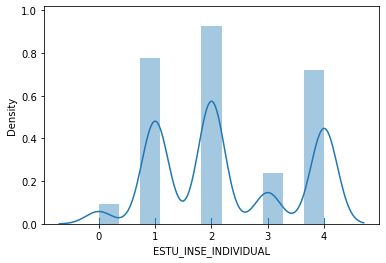

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


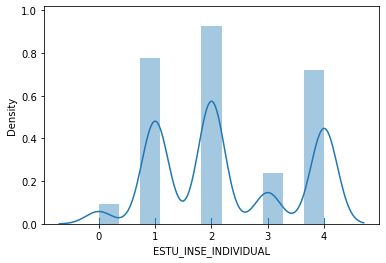

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


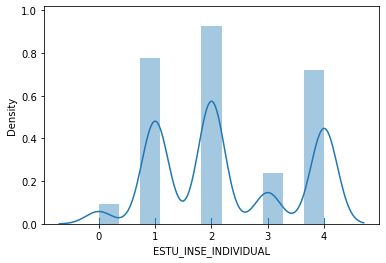

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


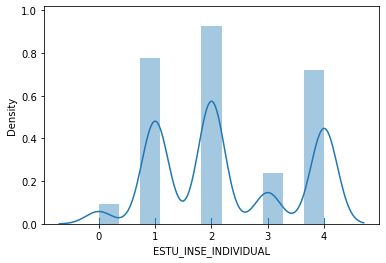

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


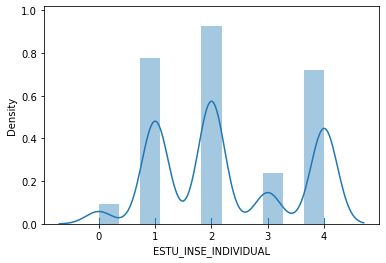

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


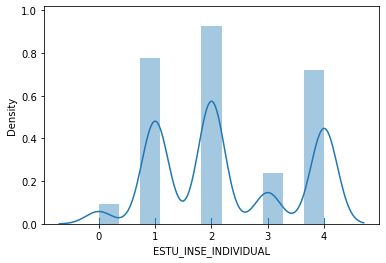

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


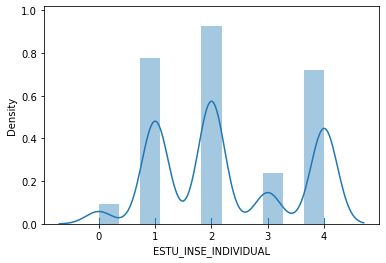

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


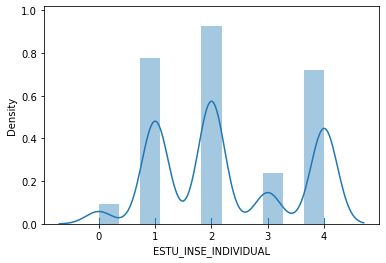

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


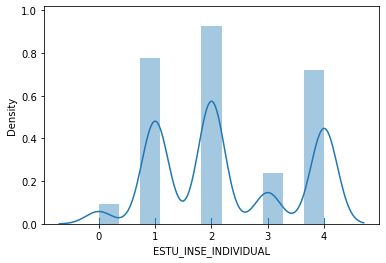

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


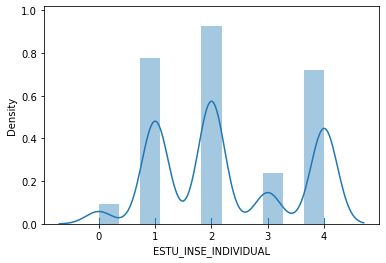

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


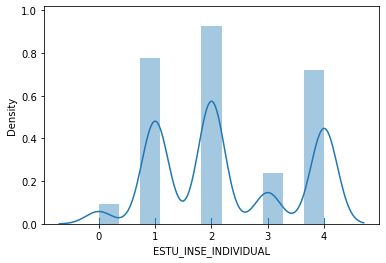

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


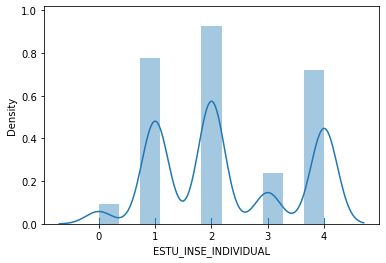

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


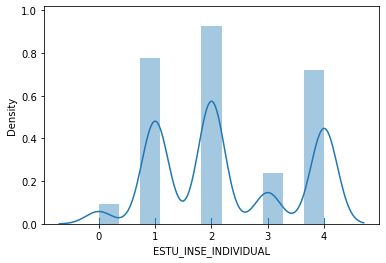

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


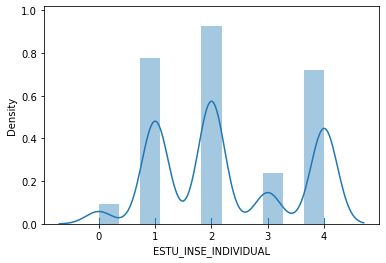

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


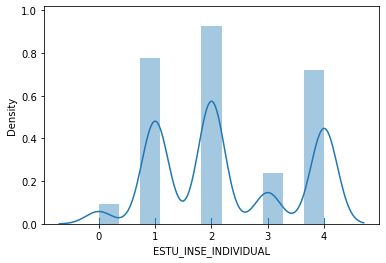

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


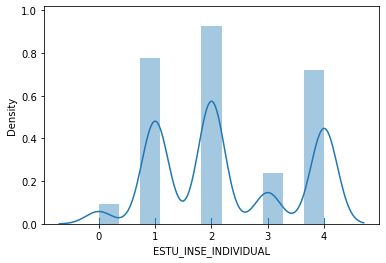

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


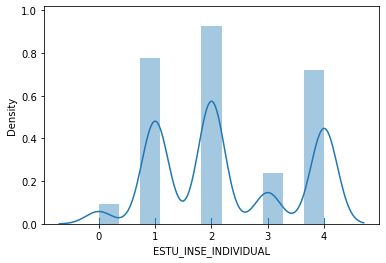

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


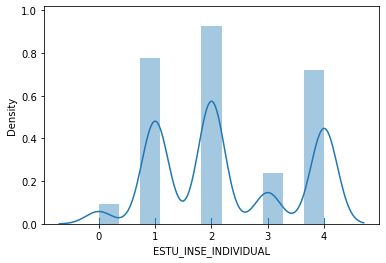

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


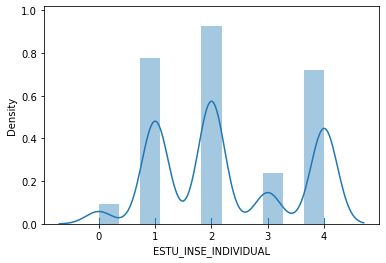

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


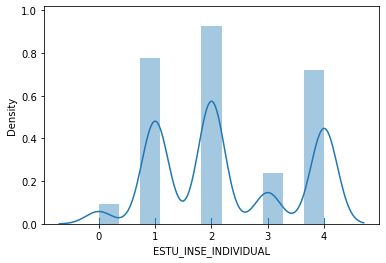

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


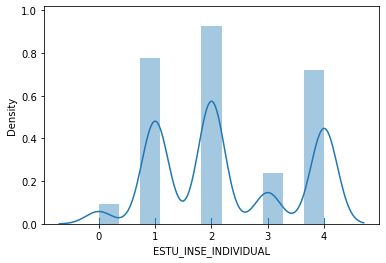

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


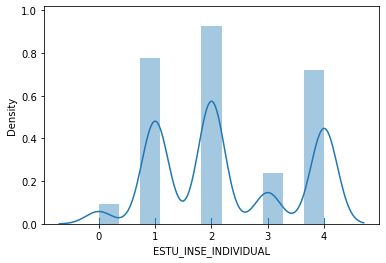

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


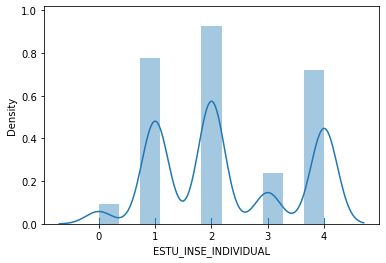

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


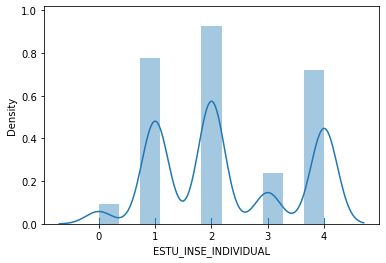

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


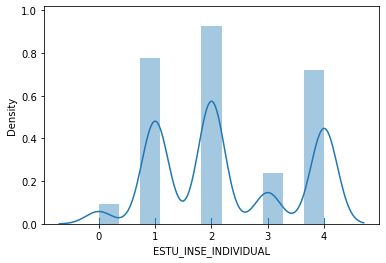

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


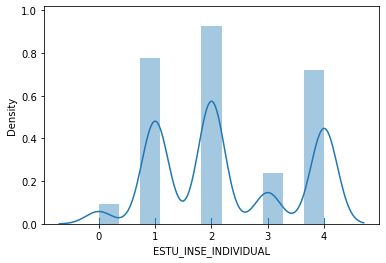

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


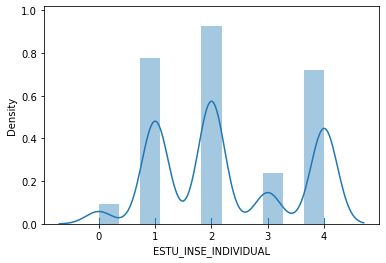

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


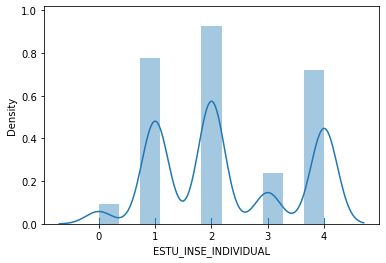

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


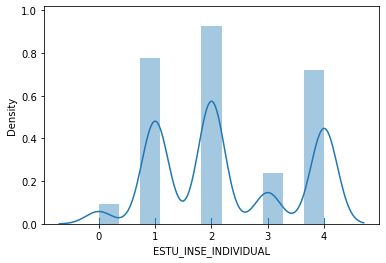

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


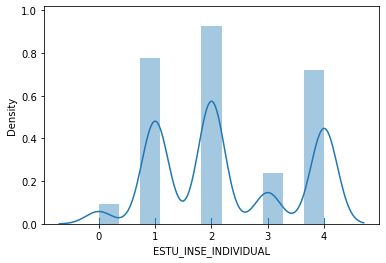

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


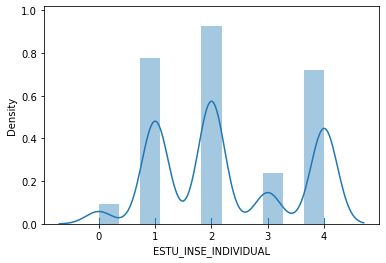

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


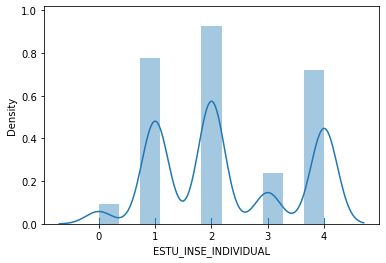

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


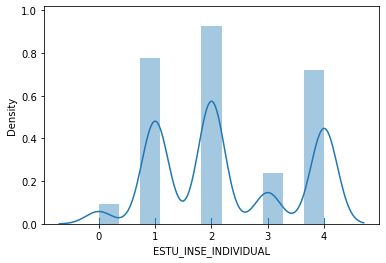

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


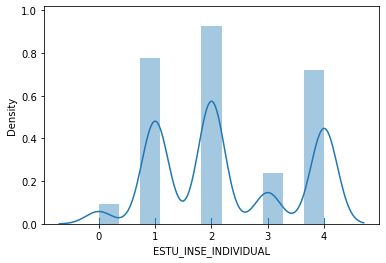

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


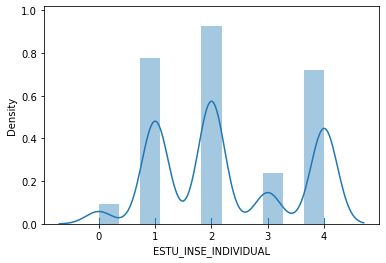

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


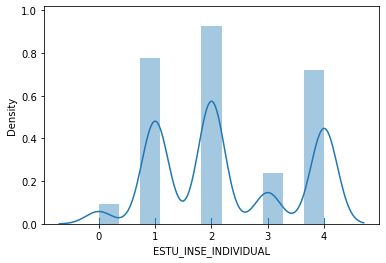

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


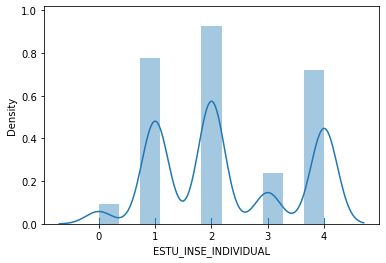

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


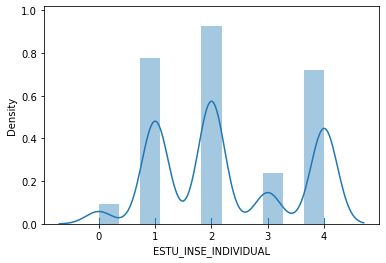

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


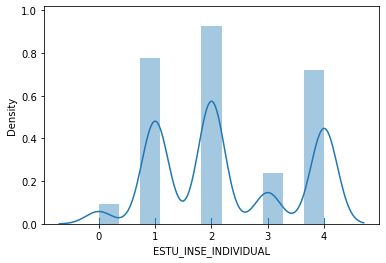

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


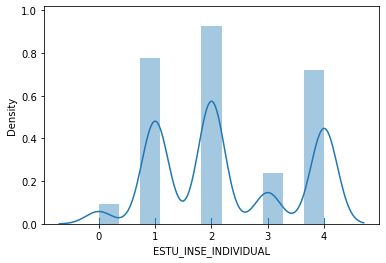

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


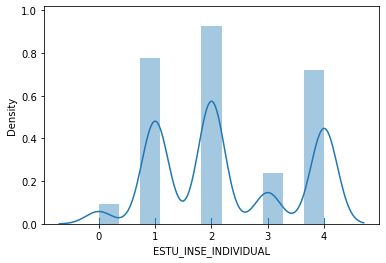

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


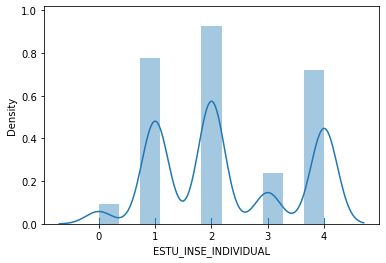

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


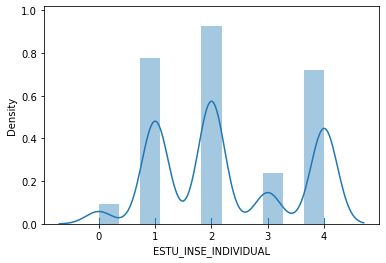

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


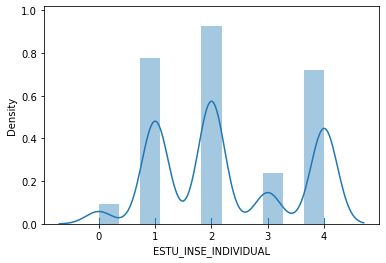

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


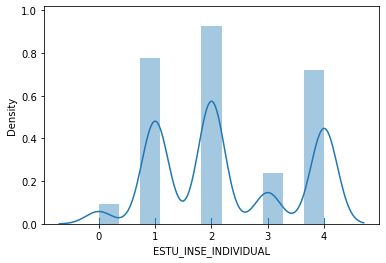

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


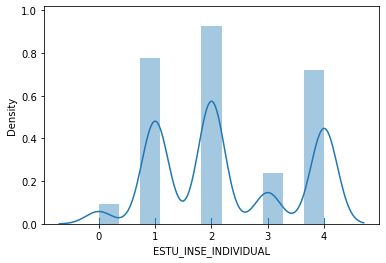

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


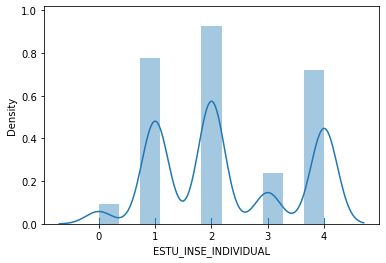

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


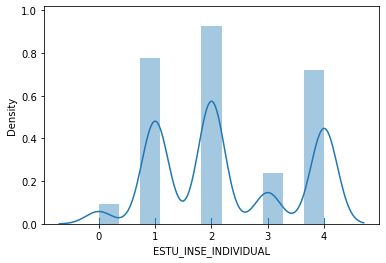

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


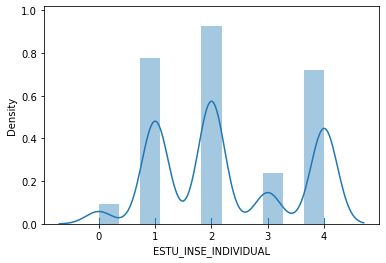

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


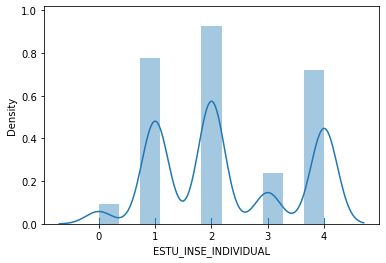

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


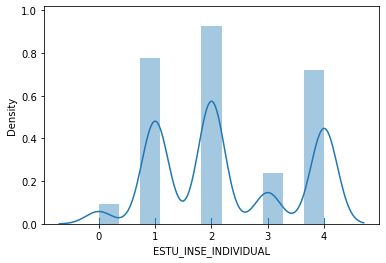

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


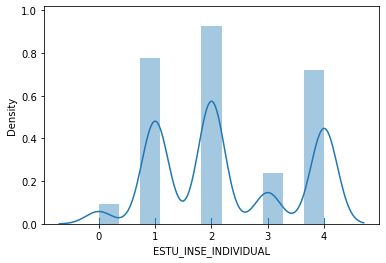

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


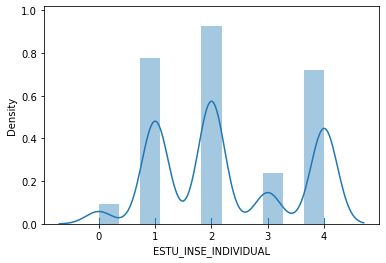

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


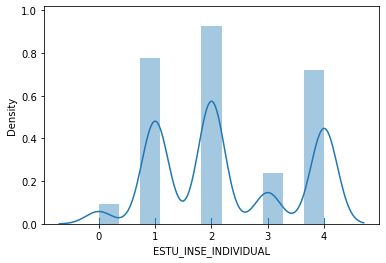

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


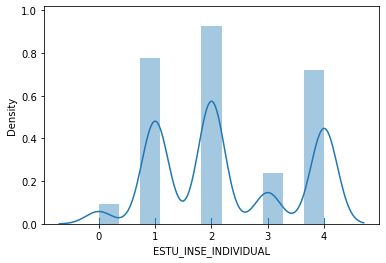

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


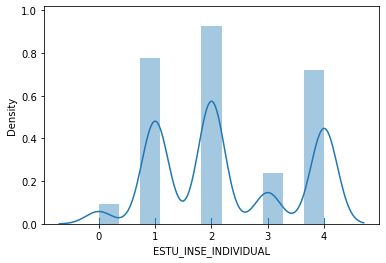

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


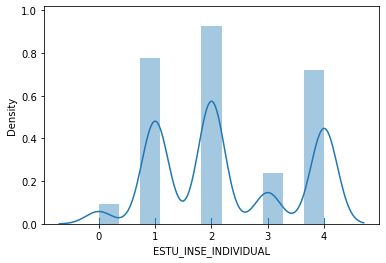

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


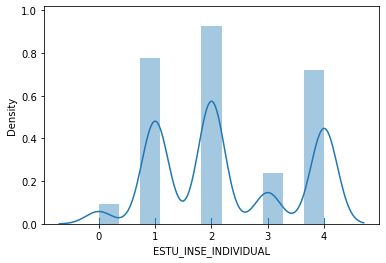

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


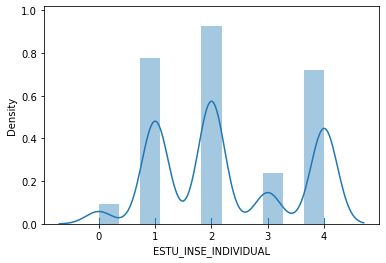

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


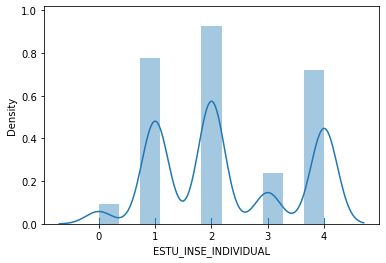

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


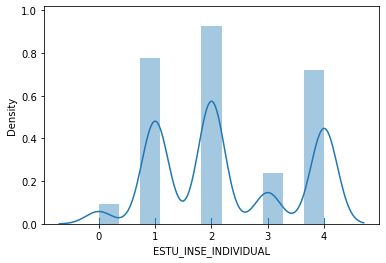

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


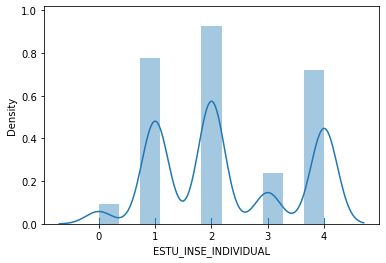

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


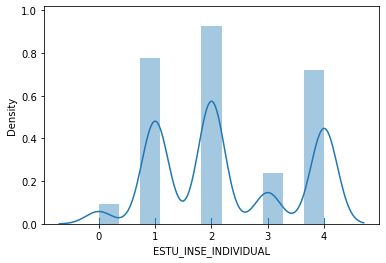

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


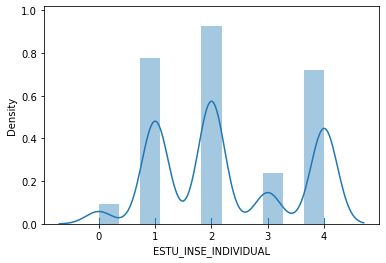

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


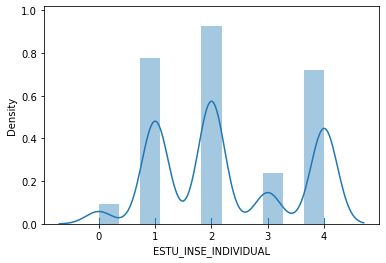

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


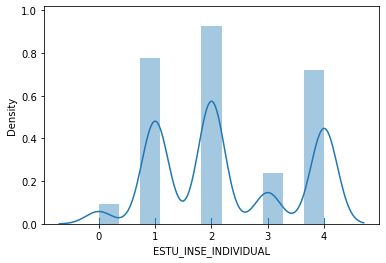

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


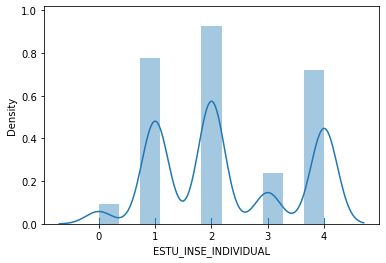

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


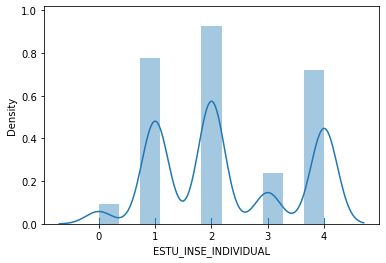

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


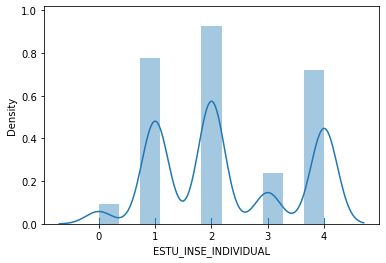

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


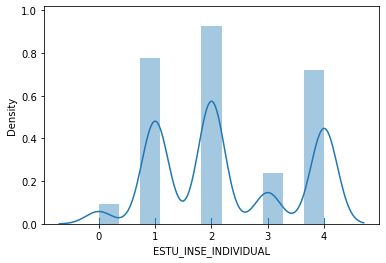

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


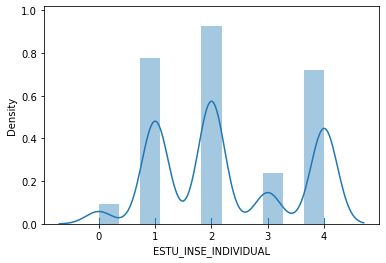

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


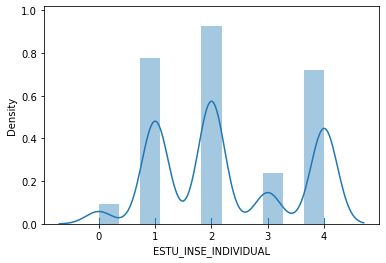

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


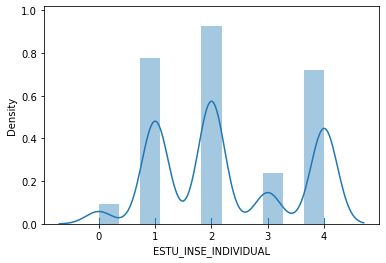

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


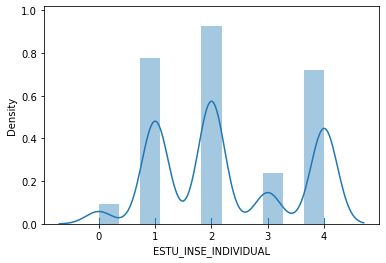

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


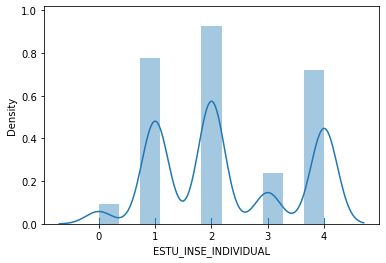

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


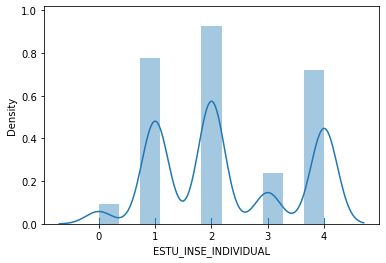

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


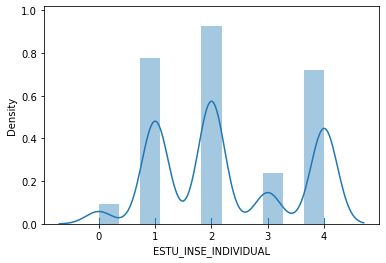

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


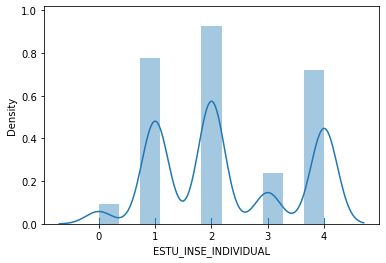

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


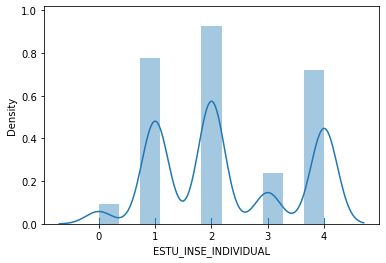

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


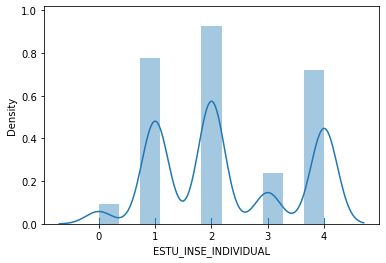

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


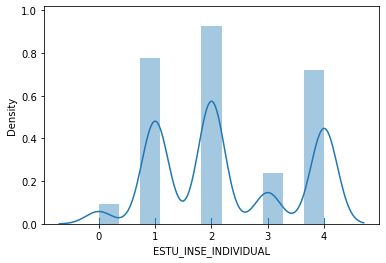

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


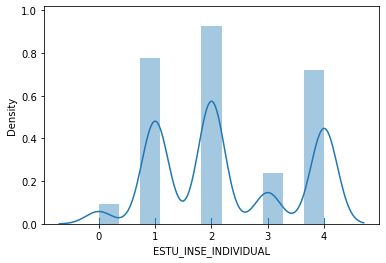

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


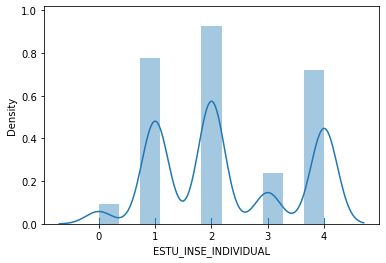

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


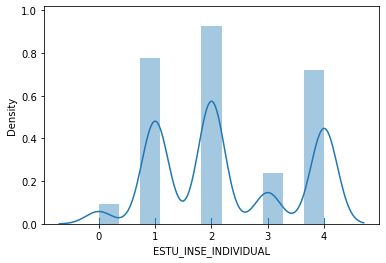

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


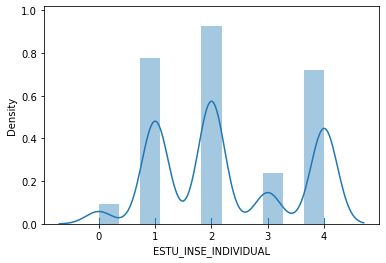

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


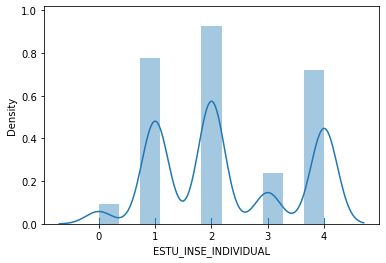

In [ ]:

for col in df.select_dtypes(exclude='category').columns[1:]:

  sns.distplot(df["ESTU_INSE_INDIVIDUAL"], kde=True, rug=True)
  plt.show()


#Selección de variables

In [ ]:
X = df.filter(['RESULT_PUNTAJE',	'RESULT_DESEMPENO', 'MOD_COMUNI_ESCRITA_DESEM',	'MOD_COMUNI_ESCRITA_PNAL',	'MOD_COMUNI_ESCRITA_PNBC',	'PUNT_GLOBAL'	,	'PERCENTIL_NBC',	'PERCENTIL_GLOBAL',	'ESTU_INSE_INDIVIDUAL','ESTU_NSE_INDIVIDUAL',	'ESTU_NSE_IES'])
y = df

#Algoritmos seleccionados e implementación

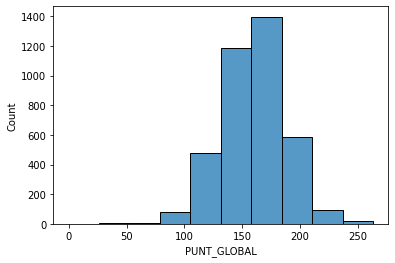

In [ ]:
sns.histplot(data=df, x='PUNT_GLOBAL', bins=10)

In [ ]:
X= df.filter(['RESULT_PUNTAJE',	'RESULT_DESEMPENO','PUNT_GLOBAL'])
y = df.filter(['ESTU_INSE_INDIVIDUAL'])

In [ ]:
#DecisionTree
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
y_pred = reg_tree.predict(X_test)
y_fit_train = reg_tree.predict(X_train)

[Text(0.45689655172413796, 0.9, 'X[2] <= 177.5\nsquared_error = 1.489\nsamples = 3084\nvalue = 2.252'),
 Text(0.1896551724137931, 0.7, 'X[0] <= 24.0\nsquared_error = 1.267\nsamples = 2292\nvalue = 2.001'),
 Text(0.06896551724137931, 0.5, 'X[2] <= 137.5\nsquared_error = 0.592\nsamples = 50\nvalue = 0.26'),
 Text(0.034482758620689655, 0.3, 'squared_error = 0.0\nsamples = 29\nvalue = 0.0'),
 Text(0.10344827586206896, 0.3, 'X[2] <= 148.5\nsquared_error = 1.188\nsamples = 21\nvalue = 0.619'),
 Text(0.06896551724137931, 0.1, 'squared_error = 1.918\nsamples = 7\nvalue = 1.286'),
 Text(0.13793103448275862, 0.1, 'squared_error = 0.49\nsamples = 14\nvalue = 0.286'),
 Text(0.3103448275862069, 0.5, 'X[2] <= 158.5\nsquared_error = 1.212\nsamples = 2242\nvalue = 2.04'),
 Text(0.2413793103448276, 0.3, 'X[2] <= 84.5\nsquared_error = 1.063\nsamples = 1419\nvalue = 1.901'),
 Text(0.20689655172413793, 0.1, 'squared_error = 0.859\nsamples = 8\nvalue = 0.875'),
 Text(0.27586206896551724, 0.1, 'squared_erro

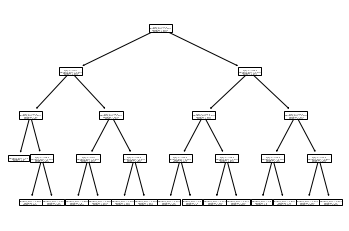

In [ ]:
from sklearn import tree
tree.plot_tree(reg_tree)

In [ ]:
#Random Forest
X, y = make_classification(n_samples=1000,n_features=4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
rf_cls = RandomForestClassifier(n_estimators=10)
rf_cls.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_fit_train = rf_cls.predict(X_train)
y_pred = rf_cls.predict(X_test)

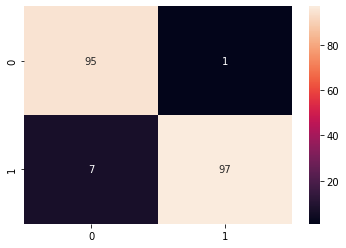

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
X, y = make_regression(n_samples=1000, n_features=4, noise=0.2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
rf_reg = RandomForestRegressor(max_depth=6, n_estimators=15)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=15)

In [ ]:
y_fit_train = rf_reg.predict(X_train)
y_pred = rf_reg.predict(X_test)

In [ ]:
y_fit_train

array([-2.09405708e+02,  4.06137829e+01,  2.70015679e+01, -4.32398997e+01,
        5.79103580e+00,  1.40914975e+02,  1.47559747e+02,  1.67504341e+01,
        4.11326221e+00, -9.87074170e+01, -8.81448225e+01,  1.44717803e+02,
        3.62281438e+01,  3.63367293e+01, -2.20054589e+02,  1.53646643e+02,
       -2.33989660e+02, -2.20160555e+01, -5.86980734e+01, -4.55913683e+01,
        5.95426422e+01, -9.76557528e+01,  1.40161125e+02,  3.63367293e+01,
       -8.60545608e+01, -1.09468401e+02, -5.25672206e+01,  1.78660764e+02,
       -7.80332101e+01, -4.95569340e+01, -8.90613435e+01, -5.81325756e+01,
        5.79103580e+00, -1.34082699e+02, -7.89678622e+01,  1.08004877e+01,
       -1.44543811e+02, -5.45839180e+01, -8.92351362e+01, -2.71447310e+01,
       -5.62797549e+01,  1.54245848e+02,  3.23680148e+01, -9.70881406e+01,
        9.17916181e+01,  4.28835664e+01,  1.27769162e+02,  3.89460521e+00,
       -1.53716218e+01, -6.60847482e+01,  6.35711946e+01, -4.63665879e+01,
       -1.84128599e+01, -

In [ ]:
y_pred

array([  99.57801973,  109.065263  ,   23.44477565,   15.50787627,
         -9.33608108, -122.44095069,   17.30762449,   72.72329503,
        -76.33036665,   91.77724269, -142.2136574 ,  -13.87064624,
        -60.45511423,   97.59372546,   82.29080023,  -32.03624906,
       -123.21110122,  -79.60116741,   72.63557877,   16.92979492,
       -148.56743937,  -36.67134289,  -78.26763682,  -89.47413231,
         82.42663649, -105.37527091,  -71.13162868,   80.59152253,
         94.40501064,  -18.34491729,   24.58801174,    7.95933514,
        -31.74704249,  -22.31766115,  -72.01223096,  131.90606818,
       -107.68473273,  -42.88932246,  -78.34336955,  -92.48770623,
        138.93530066,   33.83855901,  -12.69705015,    2.79818656,
        155.18158716,  -78.7738422 ,   81.44386294,   91.54297299,
        130.33085594,   65.35596187,  167.54934169,  -85.94860854,
         49.18561138,   94.27826862,  -42.31101303,  -97.86676938,
        125.96068081,  -75.13780851,  -83.65341897,  -92.08640

#Métrica en el conjunto de testeo del algoritmo seleccionado

In [ ]:
#metricas Decision tree
def metricas(y_true, y_pred): 
  print(f'MSE: {mean_squared_error(y_true, y_pred)}')
  print(f'MAE: {mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE: {np.sqrt(mean_squared_error(y_true,y_pred))}')
print('Métricas iniciales',end='\n')
print('---'*10)
metricas(y_train, y_fit_train)
print('---'*10)
print('Métricas testeo')
print('---'*10)
metricas(y_test, y_pred)

Métricas iniciales
------------------------------
MSE: 0.00125
MAE: 0.00125
RMSE: 0.035355339059327376
------------------------------
Métricas testeo
------------------------------
MSE: 0.04
MAE: 0.04
RMSE: 0.2


In [ ]:
#metricas Random Forest
def metricas_clas(y_true, y_pred):
  print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
  print(f"Precision: {precision_score(y_true, y_pred, average='weighted')}")
  print(f"Recall: {recall_score(y_true, y_pred,average='weighted')}")
print('---'*10)
print('Métricas iniciales')
print('---'*10)
metricas_clas(y_train, y_fit_train)
print('---'*10)
print('Métricas en testeo')
print('---'*10)
metricas_clas(y_test, y_pred)

------------------------------
Métricas iniciales
------------------------------
Accuracy: 0.99875
Precision: 0.9987531094527364
Recall: 0.99875
------------------------------
Métricas en testeo
------------------------------
Accuracy: 0.96
Precision: 0.9617527010804321
Recall: 0.96


In [ ]:
print('Métricas del entrenamiento',end='\n')
print('---'*10)
metricas(y_train, y_fit_train)
print('---'*10)
print('Métricas del testeo')
print('---'*10)
metricas(y_test, y_pred)

Métricas del entrenamiento
------------------------------
MSE: 654.07394197322
MAE: 19.830272273391724
RMSE: 25.57486934420624
------------------------------
Métricas del testeo
------------------------------
MSE: 1646.163818073796
MAE: 30.639492984952327
RMSE: 40.57294440971466
